### COMP 484 Lab 3

Srishan Shakya

Roll No. 46

CE

# Clustering - Finding Related Posts

## Measuring the relatedness of posts

**How to do it**

*Bag of words* approach. Create vectors of occurrence and follow the procedure: 
1. Extract salient features from each post and store it as a vector per post.
2. Then compute clustering on the vectors.
3. Determine the cluster for the post in question.
4. From this cluster, fetch a handful of posts having a different similarity to the post in question. This will increase diversity.

## Preprocessing - similarity measured as a similar number of common words

### Converting raw text into a bag of words

In [1]:
from sklearn.feature_extraction.text import CountVectorizer # CountVectorizer counts words as vector efficiently
vectorizer = CountVectorizer(min_df = 1)

In [2]:
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [3]:
content = ["How to format my hard disk", "Hard disk format problems"]
X = vectorizer.fit_transform(content) # Vecotization of the posts
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [4]:
print(X.toarray().transpose()) # Fetching the counts

[[1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [5]:
import os
DIR = 'C:\\Users\\srish\\ML Labs\\data\\toy'
posts = [open(os.path.join(DIR, f)).read() for f in os.listdir(DIR)]

In [6]:
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 5, #features: 25


In [7]:
print(vectorizer.get_feature_names())

['about', 'actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'provide', 'save', 'storage', 'store', 'stuff', 'this', 'toy']


In [8]:
new_post = "imaging databases" # we want to find the most similar post for the short post "imaging databases"
new_post_vec = vectorizer.transform([new_post])

In [9]:
print(new_post_vec)

  (0, 5)	1
  (0, 7)	1


In [10]:
print(new_post_vec.toarray())

[[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [11]:
import scipy as sp
def dist_raw(v1, v2): # Naive similarity measurement with Euclidean distance
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray()) # norm() calculates Euclidean norm

In [12]:
import sys
best_doc = None
best_dist = sys.maxsize
best_i = None
for i, post in enumerate(posts):
    if post == new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_raw(post_vec, new_post_vec)
    print("=== Post %i with dist = %.2f: %s" %(i, d, post))
    if d < best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist = %.2f" %(best_i, best_dist))

=== Post 0 with dist = 4.00: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist = 1.73: Imaging databases provide storage capabilities.
=== Post 2 with dist = 2.00: Most imaging databases save images permanently.

=== Post 3 with dist = 1.41: Imaging databases store data.
=== Post 4 with dist = 5.10: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist = 1.41


In [13]:
# Post 4 is same as Post 3 repeated 3 times but the distance of Post 4 is much greater tha Post 3
print(X_train.getrow(3).toarray()) #Post 3 
print(X_train.getrow(4).toarray()) #Post 4

[[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]]
[[0 0 0 0 3 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]]


### Normalizing word count vectors

In [14]:
def dist_norm(v1, v2):
    v1_norm = v1/sp.linalg.norm(v1.toarray())
    v2_norm = v2/sp.linalg.norm(v2.toarray())
    delta = v1_norm - v2_norm
    return sp.linalg.norm(delta.toarray())

In [15]:
best_doc = None
best_dist = sys.maxsize
best_i = None
for i, post in enumerate(posts):
    if post == new_post:
        continue
    post_vec = X_train.getrow(i)
    #Similarity using normalized (to unit length) word count vector i.e. repeated words are treated as 1
    d = dist_norm(post_vec, new_post_vec) 
    print("=== Post %i with dist = %.2f: %s" %(i, d, post))
    if d < best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist = %.2f" %(best_i, best_dist))

=== Post 0 with dist = 1.41: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist = 0.86: Imaging databases provide storage capabilities.
=== Post 2 with dist = 0.92: Most imaging databases save images permanently.

=== Post 3 with dist = 0.77: Imaging databases store data.
=== Post 4 with dist = 0.77: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist = 0.77


### Removing less important words

In [16]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english') # frequently appearing words are removed as stop words
sorted(vectorizer.get_stop_words()) [0:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [17]:
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape
print(vectorizer.get_feature_names()) # No more stop words...7 words lighter

['actually', 'capabilities', 'contains', 'data', 'databases', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'provide', 'save', 'storage', 'store', 'stuff', 'toy']


In [18]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])

best_doc = None
best_dist = sys.maxsize
best_i = None
for i, post in enumerate(posts):
    if post == new_post:
        continue
    post_vec = X_train.getrow(i)
    #Similarity using normalized (to unit length) word count vector i.e. repeated words are treated as 1
    d = dist_norm(post_vec, new_post_vec) 
    print("=== Post %i with dist = %.2f: %s" %(i, d, post))
    if d < best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist = %.2f" %(best_i, best_dist))

=== Post 0 with dist = 1.41: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist = 0.86: Imaging databases provide storage capabilities.
=== Post 2 with dist = 0.86: Most imaging databases save images permanently.

=== Post 3 with dist = 0.77: Imaging databases store data.
=== Post 4 with dist = 0.77: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 3 with dist = 0.77


### Stemming
Counting words such as "imaging" and "images" as same is called stemming (reducing words to their specific word stem).

Use **Natural Language Toolkit (NLTK)** for stemming

In [19]:
import nltk

In [20]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')
s.stem("graphics")

'graphic'

In [21]:
s.stem("imaging")

'imag'

In [22]:
s.stem("image")

'imag'

In [23]:
s.stem("imagination")

'imagin'

In [24]:
s.stem("imagine")

'imagin'

In [25]:
s.stem("buying")

'buy'

In [26]:
s.stem("bought") 

'bought'

### Extending the vectorizer with NLTK's stemmer

In [27]:
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

vectorizer = StemmedCountVectorizer(min_df = 1, stop_words = 'english')

In [28]:
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape
print(vectorizer.get_feature_names())

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'save', 'storag', 'store', 'stuff', 'toy']


In [29]:
new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])

# Post 2 is the most similar post to our new post, as it contains the concept "imag" twice

best_doc = None
best_dist = sys.maxsize
best_i = None
for i, post in enumerate(posts):
    if post == new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_norm(post_vec, new_post_vec) 
    print("=== Post %i with dist = %.2f: %s" %(i, d, post))
    if d < best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist = %.2f" %(best_i, best_dist)) 

=== Post 0 with dist = 1.41: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist = 0.86: Imaging databases provide storage capabilities.
=== Post 2 with dist = 0.63: Most imaging databases save images permanently.

=== Post 3 with dist = 0.77: Imaging databases store data.
=== Post 4 with dist = 0.77: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 2 with dist = 0.63


### Stop words on steroids

In [30]:
#  term frequency – inverse document frequency (TF-IDF) weighs words according to their occurrences in the test data
def tfidf(term, doc, corpus): # Test tfidf
    tf = doc.count(term) / len(doc)
    num_docs_with_term = len([d for d in corpus if term in d])
    idf = sp.log(len(corpus) / num_docs_with_term)
    return tf * idf

In [31]:
a, abb, abc = ["a"], ["a", "b", "b"], ["a", "b", "c"]
D = [a, abb, abc]
print(tfidf("a", a, D))

0.0


In [32]:
print(tfidf("a", abb, D))

0.0


In [33]:
print(tfidf("a", abc, D))

0.0


In [34]:
print(tfidf("b", abb, D))

0.27031007207210955


In [35]:
print(tfidf("a", abc, D))

0.0


In [36]:
print(tfidf("b", abc, D))

0.13515503603605478


In [37]:
print(tfidf("c", abc, D))

0.3662040962227032


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer # To use optimimmzed tfidf from scikit-learn
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english', decode_error='ignore')

In [39]:
X_train = vectorizer.fit_transform(posts)
num_samples, num_features = X_train.shape
print(vectorizer.get_feature_names())

new_post = "imaging databases"
new_post_vec = vectorizer.transform([new_post])

best_doc = None
best_dist = sys.maxsize
best_i = None
for i, post in enumerate(posts):
    if post == new_post:
        continue
    post_vec = X_train.getrow(i)
    d = dist_norm(post_vec, new_post_vec) 
    print("=== Post %i with dist = %.2f: %s" %(i, d, post))
    if d < best_dist:
        best_dist = d
        best_i = i
print("Best post is %i with dist = %.2f" %(best_i, best_dist)) 

['actual', 'capabl', 'contain', 'data', 'databas', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'provid', 'save', 'storag', 'store', 'stuff', 'toy']
=== Post 0 with dist = 1.41: This is a toy post about machine learning. Actually, it contains not much interesting stuff.
=== Post 1 with dist = 1.08: Imaging databases provide storage capabilities.
=== Post 2 with dist = 0.86: Most imaging databases save images permanently.

=== Post 3 with dist = 0.92: Imaging databases store data.
=== Post 4 with dist = 0.92: Imaging databases store data. Imaging databases store data. Imaging databases store data.
Best post is 2 with dist = 0.86


## Clustering

### K-means
Widely used flat clustering algorithm.

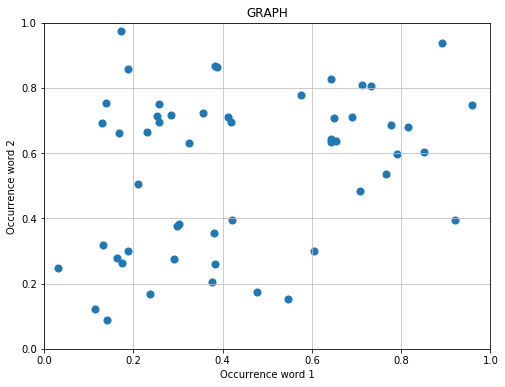

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.746456379702266


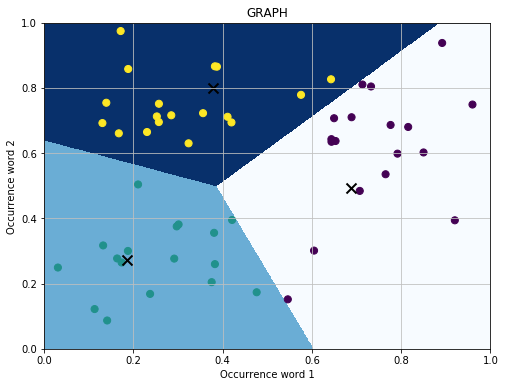

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.746456379702266
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.835476341923971


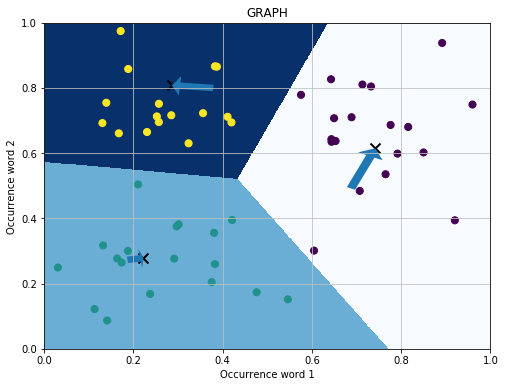

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.746456379702266
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.835476341923971
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.536046256119067


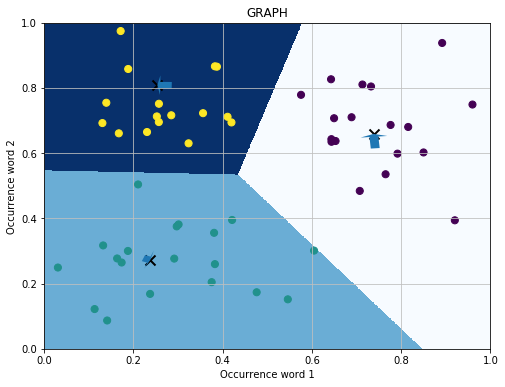

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.746456379702266
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.835476341923971
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.536046256119067
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.447223016211801


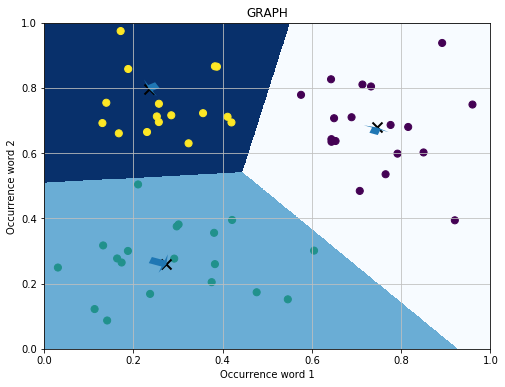

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3.746456379702266
start iteration
done sorting
end inner loop
Iteration 1, inertia 2.835476341923971
start iteration
done sorting
end inner loop
Iteration 2, inertia 2.536046256119067
start iteration
done sorting
end inner loop
Iteration 3, inertia 2.447223016211801
start iteration
done sorting
end inner loop
Iteration 4, inertia 2.447223016211801
center shift 0.000000e+00 within tolerance 7.366762e-06


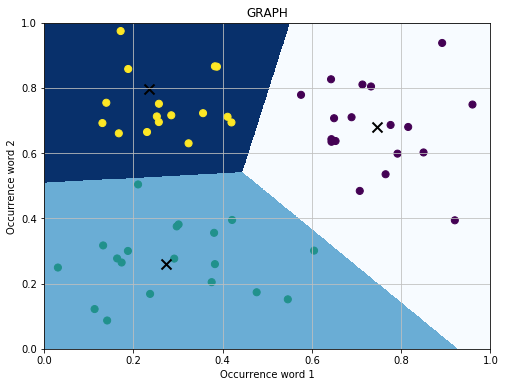

In [40]:
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
%matplotlib inline

#Clustering of toy example of posts containing only two words with flat clustering K-means
seed = 2
sp.random.seed(seed)

num_clusters =3

xw1 = norm(loc=0.3, scale=.15).rvs(20)
yw1 = norm(loc=0.3, scale=.15).rvs(20)

xw2 = norm(loc=0.7, scale=.15).rvs(20)
yw2 = norm(loc=0.7, scale=.15).rvs(20)

xw3 = norm(loc=0.2, scale=.15).rvs(20)
yw3 = norm(loc=0.8, scale=.15).rvs(20)

x = sp.append(sp.append(xw1, xw2), xw3)
y = sp.append(sp.append(yw1, yw2), yw3)

plt.figure(num=None, figsize=(8, 6))
plt.scatter(x, y, s=50)

plt.title("GRAPH")
plt.xlabel("Occurrence word 1")
plt.ylabel("Occurrence word 2")

plt.autoscale(tight=True)
plt.ylim(ymin=0, ymax=1)
plt.xlim(xmin=0, xmax=1)
plt.grid(True, linestyle='-', color='0.75')
plt.show()

ca = [None] * 6
cb = [None] * 6
cc = [None] * 6
mx, my = sp.meshgrid(sp.arange(0, 1, 0.001), sp.arange(0, 1, 0.001))

#Iterate for 5 timess
for i in range(1,6):
    km = KMeans(init = 'random', n_clusters = num_clusters, verbose =1, n_init=1, max_iter =i, random_state=seed)
    km.fit(sp.array(list(zip(x,y))))

    Z = km.predict(sp.c_[mx.ravel(),my.ravel()]).reshape(mx.shape)

    plt.figure(num=None, figsize=(8, 6))
    plt.scatter(x, y, s=50, c = km.predict(list(zip(x,y))))

    plt.title("GRAPH")
    plt.xlabel("Occurrence word 1")
    plt.ylabel("Occurrence word 2")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0, ymax=1)
    plt.xlim(xmin=0, xmax=1)
    plt.grid(True, linestyle='-', color='0.75')
    plt.imshow(Z, interpolation='nearest',extent=(mx.min(), mx.max(), my.min(), my.max()),cmap=pylab.cm.Blues,aspect='auto', origin='lower')
    ca[i], cb[i], cc[i] = km.cluster_centers_
    #c2a,c2b,c2c = km.cluster_centers_
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
                  marker='x', linewidth=2, s=100, color='black')
    if(i >= 2):
        plt.gca().add_patch(
            plt.Arrow(ca[i-1][0], ca[i-1][1], ca[i][0] - ca[i-1][0], ca[i][1] - ca[i-1][1], width=0.1))
        plt.gca().add_patch(
            plt.Arrow(cb[i-1][0], cb[i-1][1], cb[i][0] - cb[i-1][0], cb[i][1] - cb[i-1][1], width=0.1))
        plt.gca().add_patch(
            plt.Arrow(cc[i-1][0], cc[i-1][1], cc[i][0] - cc[i-1][0], cc[i][1] - cc[i-1][1], width=0.1))
    plt.show()

### Getting test data to evaluate our ideas on
*20newsgroup* dataset. 18,846 posts from 20 different newsgroups. Can be fetched from skearn.datasets 

In [41]:
from sklearn.datasets import fetch_20newsgroups
all_data = fetch_20newsgroups(subset = "all")
print(len(all_data.filenames))

18846


In [42]:
print(all_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [43]:
groups = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
          'comp.sys.mac.hardware', 'comp.windows.x', 'sci.space']
train_data = fetch_20newsgroups(subset = 'train', categories = groups)
print(len(train_data.filenames))
test_data = fetch_20newsgroups(subset = 'test', categories = groups)
print(len(test_data.filenames))

3529
2349


### Clustering posts

In [44]:
vectorizer = StemmedTfidfVectorizer(min_df=10, max_df=0.5, stop_words='english', decode_error='ignore')
vectorized = vectorizer.fit_transform(train_data.data)
num_samples, num_features = vectorized.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 3529, #features: 4712


In [45]:
num_clusters = 50 #try changing this value and see difference
km = KMeans(n_clusters = num_clusters, init = 'random', n_init = 1, verbose = 1, random_state = 3)
km.fit(vectorized)
print(km.labels_)
print(km.inertia_)

Initialization complete
Iteration  0, inertia 5899.560
Iteration  1, inertia 3218.298
Iteration  2, inertia 3184.333
Iteration  3, inertia 3164.867
Iteration  4, inertia 3152.004
Iteration  5, inertia 3143.111
Iteration  6, inertia 3136.256
Iteration  7, inertia 3129.325
Iteration  8, inertia 3124.567
Iteration  9, inertia 3121.900
Iteration 10, inertia 3120.210
Iteration 11, inertia 3118.627
Iteration 12, inertia 3117.363
Iteration 13, inertia 3116.811
Iteration 14, inertia 3116.588
Iteration 15, inertia 3116.417
Iteration 16, inertia 3115.760
Iteration 17, inertia 3115.374
Iteration 18, inertia 3115.155
Iteration 19, inertia 3114.949
Iteration 20, inertia 3114.515
Iteration 21, inertia 3113.937
Iteration 22, inertia 3113.720
Iteration 23, inertia 3113.548
Iteration 24, inertia 3113.475
Iteration 25, inertia 3113.447
Converged at iteration 25: center shift 0.000000e+00 within tolerance 2.069005e-08
[38 17 47 ... 41 14 16]
3113.4467573371267


In [46]:
print(km.labels_.shape)

(3529,)


In [47]:
print(km.cluster_centers_)

[[0.         0.         0.         ... 0.         0.         0.05115952]
 [0.00255397 0.         0.         ... 0.         0.         0.        ]
 [0.00585929 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07535044 0.         ... 0.         0.         0.        ]]


## Solving our initial challenge

In [48]:
new_post = "Disk drive problems. Hi, I have a problem with my hard disk. After 1 year it is working only sporadically now. I tried to format it, but now it doesn't boot any more. Any ideas? Thanks."
new_post_vec = vectorizer.transform([new_post])
new_post_label = km.predict(new_post_vec)[0]

In [49]:
similar_indices = (km.labels_==new_post_label).nonzero()[0]
# comparison in the bracket results in a Boolean array, and nonzero converts that array into a smaller array containing the indices of the True elements

similar = []

for i in similar_indices:
    dist = sp.linalg.norm((new_post_vec - vectorized[i]).toarray())
    similar.append((dist, train_data.data[i]))
similar = sorted(similar)
print("Count similar: %i" % len(similar))

Count similar: 166


In [50]:
show_at_1 = similar[0]
show_at_2 = similar[int(len(similar)/10)]
show_at_3 = similar[int(len(similar)/2)]

print("=== #1 ===")
print(show_at_1)
print()

print("=== #2 ===")
print(show_at_2)
print()

print("=== #3 ===")
print(show_at_3)

=== #1 ===
(1.0378441731334072, "From: Thomas Dachsel <GERTHD@mvs.sas.com>\nSubject: BOOT PROBLEM with IDE controller\nNntp-Posting-Host: sdcmvs.mvs.sas.com\nOrganization: SAS Institute Inc.\nLines: 25\n\nHi,\nI've got a Multi I/O card (IDE controller + serial/parallel\ninterface) and two floppy drives (5 1/4, 3 1/2) and a\nQuantum ProDrive 80AT connected to it.\nI was able to format the hard disk, but I could not boot from\nit. I can boot from drive A: (which disk drive does not matter)\nbut if I remove the disk from drive A and press the reset switch,\nthe LED of drive A: continues to glow, and the hard disk is\nnot accessed at all.\nI guess this must be a problem of either the Multi I/o card\nor floppy disk drive settings (jumper configuration?)\nDoes someone have any hint what could be the reason for it.\nPlease reply by email to GERTHD@MVS.SAS.COM\nThanks,\nThomas\n+-------------------------------------------------------------------+\n| Thomas Dachsel                              

### Another look at noise

In [51]:
post_group = zip(train_data.data, train_data.target)
all = [(len(post[0]), post[0], train_data.target_names[post[1]]) for post in post_group]
graphics = sorted([post for post in all if post[2]=='comp.graphics'])
print(graphics[5])

(245, 'From: SITUNAYA@IBM3090.BHAM.AC.UK\nSubject: test....(sorry)\nOrganization: The University of Birmingham, United Kingdom\nLines: 1\nNNTP-Posting-Host: ibm3090.bham.ac.uk\n\n==============================================================================\n', 'comp.graphics')


The data is noisy as even posts under same newsgroup *comp.graphics* aren't clustered properly. There is no indication that the above post belongs to the *comp.graphics* 

In [52]:
noise_post = graphics[5][1]
analyzer = vectorizer.build_analyzer()
print(list(analyzer(noise_post)))

['situnaya', 'ibm3090', 'bham', 'ac', 'uk', 'subject', 'test', 'sorri', 'organ', 'univers', 'birmingham', 'unit', 'kingdom', 'line', 'nntp', 'post', 'host', 'ibm3090', 'bham', 'ac', 'uk']


In [53]:
useful = set(analyzer(noise_post)).intersection(vectorizer.get_feature_names())
print(sorted(useful))

['ac', 'birmingham', 'host', 'kingdom', 'nntp', 'sorri', 'test', 'uk', 'unit', 'univers']


In [54]:
for term in sorted(useful):
    print('IDF(%s)=%.2f'%(term, vectorizer._tfidf.idf_[vectorizer.vocabulary_[term]]))

IDF(ac)=3.51
IDF(birmingham)=6.77
IDF(host)=1.74
IDF(kingdom)=6.68
IDF(nntp)=1.77
IDF(sorri)=4.14
IDF(test)=3.83
IDF(uk)=3.70
IDF(unit)=4.42
IDF(univers)=1.91


Most of the words from the noisy data/post we saw, occur frequently in other posts as well as shown by the high IDF values in other posts. This further proves that we should not expect a perfect clustering.

## Tweaking the parameters
We can try tweaking the number of clusters or vectorizer's *max_features* parameter to try and get better results. We can play with different cluster center initializations. There are alternatives to K-means itslef, for example, clustering approaches that use different similarity measurements, such as Cosine similarity, Pearson, or Jaccard.

But before we go there, we will have to define what you actually mean by "better". SciKit has a complete package dedicated only to this definition. The package is called sklearn.metrics and also contains a full range of different metrics to measure clustering quality.

In [55]:
#Changing the number of clusters to 30
num_clusters = 30 
km = KMeans(n_clusters = num_clusters, init = 'random', n_init = 1, verbose = 1, random_state = 3)
km.fit(vectorized)
print(km.labels_)
print(km.inertia_)

Initialization complete
Iteration  0, inertia 6122.139
Iteration  1, inertia 3286.516
Iteration  2, inertia 3255.987
Iteration  3, inertia 3238.414
Iteration  4, inertia 3228.683
Iteration  5, inertia 3221.688
Iteration  6, inertia 3218.597
Iteration  7, inertia 3216.694
Iteration  8, inertia 3214.338
Iteration  9, inertia 3213.095
Iteration 10, inertia 3212.264
Iteration 11, inertia 3211.887
Iteration 12, inertia 3211.583
Iteration 13, inertia 3211.447
Iteration 14, inertia 3211.278
Iteration 15, inertia 3211.177
Iteration 16, inertia 3210.981
Iteration 17, inertia 3210.726
Iteration 18, inertia 3210.604
Iteration 19, inertia 3210.512
Iteration 20, inertia 3210.429
Converged at iteration 20: center shift 0.000000e+00 within tolerance 2.069005e-08
[17 25 17 ... 10 14 16]
3210.428860821732


Changing number of clusters to 30 from intial 50 results in convergence at iteration 20 instead of 25, and inertia (Sum of squared distances of samples to their closest cluster center) changed from 3113.44 to 3210.42 which shows 50 clusters has slightly better clustering.

In [56]:
#Changing the number of clusters to 70
num_clusters = 70
km = KMeans(n_clusters = num_clusters, init = 'random', n_init = 1, verbose = 1, random_state = 3)
km.fit(vectorized)
print(km.labels_)
print(km.inertia_)

Initialization complete
Iteration  0, inertia 5703.080
Iteration  1, inertia 3149.588
Iteration  2, inertia 3107.414
Iteration  3, inertia 3082.390
Iteration  4, inertia 3068.839
Iteration  5, inertia 3061.279
Iteration  6, inertia 3056.154
Iteration  7, inertia 3052.420
Iteration  8, inertia 3049.562
Iteration  9, inertia 3047.433
Iteration 10, inertia 3046.334
Iteration 11, inertia 3045.632
Iteration 12, inertia 3045.276
Iteration 13, inertia 3045.039
Iteration 14, inertia 3045.017
Converged at iteration 14: center shift 0.000000e+00 within tolerance 2.069005e-08
[38 25 47 ... 41 68 53]
3045.016854833178


Changing number of clusters to 70 from intial 50 results in convergence at iteration 14 instead of 25, and inertia (Sum of squared distances of samples to their closest cluster center) changed from 3113.44 to 3045 which shows 70 clusters has slightly better clustering.

In [57]:
# Changing max_features of Vectorizer
# Setting max_features = k means instead of whole corpus, only the k most frequent words are used to create a feature matrix
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))
    
vectorizer500 = StemmedTfidfVectorizer(min_df=10, max_df=0.5, max_features = 500, stop_words='english', decode_error='ignore')
vectorized500 = vectorizer500.fit_transform(train_data.data)
num_samples, num_features = vectorized500.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

vectorizer1000 = StemmedTfidfVectorizer(min_df=10, max_df=0.5, max_features = 1000, stop_words='english', decode_error='ignore')
vectorized1000 = vectorizer1000.fit_transform(train_data.data)
num_samples, num_features = vectorized1000.shape
print("#samples: %d, #features: %d" % (num_samples, num_features))

#samples: 3529, #features: 500
#samples: 3529, #features: 1000


In [58]:
num_clusters = 50
km = KMeans(n_clusters = num_clusters, init = 'random', n_init = 1, verbose = 1, random_state = 3)
km.fit(vectorized500)
print(km.labels_)
print(km.inertia_)

Initialization complete
Iteration  0, inertia 4954.953
Iteration  1, inertia 2853.708
Iteration  2, inertia 2782.997
Iteration  3, inertia 2755.966
Iteration  4, inertia 2738.155
Iteration  5, inertia 2728.363
Iteration  6, inertia 2720.766
Iteration  7, inertia 2714.429
Iteration  8, inertia 2709.085
Iteration  9, inertia 2704.204
Iteration 10, inertia 2698.320
Iteration 11, inertia 2694.739
Iteration 12, inertia 2691.290
Iteration 13, inertia 2685.992
Iteration 14, inertia 2680.935
Iteration 15, inertia 2679.776
Iteration 16, inertia 2678.442
Iteration 17, inertia 2676.714
Iteration 18, inertia 2674.510
Iteration 19, inertia 2672.835
Iteration 20, inertia 2672.015
Iteration 21, inertia 2671.441
Iteration 22, inertia 2670.552
Iteration 23, inertia 2670.079
Iteration 24, inertia 2669.847
Iteration 25, inertia 2669.717
Iteration 26, inertia 2669.645
Iteration 27, inertia 2669.586
Iteration 28, inertia 2669.572
Converged at iteration 28: center shift 0.000000e+00 within tolerance 1.87526

Changing *max_features* to 500 results in inertia (Sum of squared distances of samples to their closest cluster center) of 2669.57 instead of initial 3210.42 which shows for 50 clusters taking only the 500 most frequent words to created a better clusterization.

In [59]:
num_clusters = 50
km = KMeans(n_clusters = num_clusters, init = 'random', n_init = 1, verbose = 1, random_state = 3)
km.fit(vectorized1000)
print(km.labels_)
print(km.inertia_)

Initialization complete
Iteration  0, inertia 5355.445
Iteration  1, inertia 3025.632
Iteration  2, inertia 2959.690
Iteration  3, inertia 2926.132
Iteration  4, inertia 2907.970
Iteration  5, inertia 2894.008
Iteration  6, inertia 2885.708
Iteration  7, inertia 2879.440
Iteration  8, inertia 2873.288
Iteration  9, inertia 2870.392
Iteration 10, inertia 2868.611
Iteration 11, inertia 2867.335
Iteration 12, inertia 2865.671
Iteration 13, inertia 2865.098
Iteration 14, inertia 2864.709
Iteration 15, inertia 2864.330
Iteration 16, inertia 2863.284
Iteration 17, inertia 2862.591
Iteration 18, inertia 2862.423
Iteration 19, inertia 2862.280
Iteration 20, inertia 2861.972
Iteration 21, inertia 2861.865
Iteration 22, inertia 2861.807
Iteration 23, inertia 2861.760
Converged at iteration 23: center shift 0.000000e+00 within tolerance 9.543333e-08
[39 17  1 ... 41 14 22]
2861.7598325609442
